In [1]:
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
# from IPython.display import display, HTML

from pykat import finesse
from pykat.commands import *
pykat.init_pykat_plotting(dpi=90)

from pprint import pprint as pprint

                                              ..-
    PyKat 1.2.2           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [2]:
basekat = finesse.kat()
basecode = """
# constants
const Pin 1M # laser power
const lx 1
const ly 1
const Lx 4k # arm lengths
const Ly 4k
const lp 1
const ls 1
const recycR1 0.8
const recycT1 0.2
# arm cavities are overcoupled
const R1arm 0.9
const T1arm 0.1
const R2arm 1 # perfect mirror
const T2arm 0

# laser
l laser $Pin 0 nLaser
s slasertoPR 0 nLaser nPR0 # null length

# power recycling
m mPR $recycR1 $recycT1 0 nPR0 nPR1
s sPRtoBS $lp nPR1 nBSi

# central beam splitter
bs BS 0.5 0.5 0 0 nBSi nBSr nBSt nBSo
s sBStoYarm $ly nBSr nY0
s sBStoXarm $lx nBSt nX0
s sBStoSR $ls nBSo nSR0

# Y arm (perpendicular)
m mY1 $R1arm $T1arm 0 nY0 nY1
s sY $Ly nY1 nY2
m mY2 $R2arm $T2arm 0 nY2 nY3

# X arm (parallel)
m mX1 $R1arm $T1arm 0 nX0 nX1
s sX $Lx nX1 nX2
m mX2 $R2arm $T2arm 0 nX2 nX3

# signal recycling
m mSR $recycR1 $recycT1 0 nSR0 nSR1
s sSRtosqzBS 0 nSR1 npd # null length

# photodiode
pd darkport npd
"""
basekat.parse(basecode)

In [3]:
pprint((basekat.components, basekat.detectors, basekat.commands))

({'BS': <pykat.components.beamSplitter_5 (BS) at 0x7fc1d2311128>,
  'laser': <pykat.components.laser_1 (laser) at 0x7fc1dddc8940>,
  'mPR': <pykat.components.mirror_3 (mPR) at 0x7fc1d22ff400>,
  'mSR': <pykat.components.mirror_15 (mSR) at 0x7fc1d2322e10>,
  'mX1': <pykat.components.mirror_12 (mX1) at 0x7fc1d231ea20>,
  'mX2': <pykat.components.mirror_14 (mX2) at 0x7fc1d23225f8>,
  'mY1': <pykat.components.mirror_9 (mY1) at 0x7fc1d2317470>,
  'mY2': <pykat.components.mirror_11 (mY2) at 0x7fc1d231e048>,
  'sBStoSR': <pykat.components.space_8 (sBStoSR) at 0x7fc1d23170f0>,
  'sBStoXarm': <pykat.components.space_7 (sBStoXarm) at 0x7fc1d2311cf8>,
  'sBStoYarm': <pykat.components.space_6 (sBStoYarm) at 0x7fc1d22ffef0>,
  'sPRtoBS': <pykat.components.space_4 (sPRtoBS) at 0x7fc1d22ffbe0>,
  'sSRtosqzBS': <pykat.components.space_16 (sSRtosqzBS) at 0x7fc1d2322da0>,
  'sX': <pykat.components.space_13 (sX) at 0x7fc1d2322240>,
  'sY': <pykat.components.space_10 (sY) at 0x7fc1d2317c50>,
  'slasertoPR

In [4]:
kat1 = deepcopy(basekat)
kat1code = """
fsig noise 1 # noise at 1Hz
xaxis noise f lin 1 10G 1000
#yaxis abs:deg
"""
kat1.parse(kat1code)
out1 = kat1.run()

--------------------------------------------------------------
Running kat - Started at 2020-08-31 16:58:37.375179
Used Finesse 2.3.1 at /home/james/Code/cbrOzGrav/Finesse/kat

Finished in 0.0314124 seconds


100% | ETA:  0:00:00 | Calculating                                             

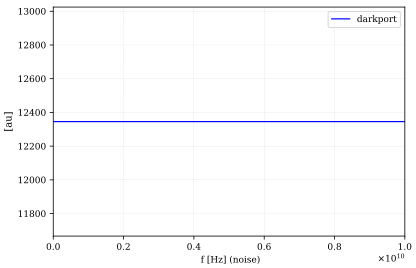

In [5]:
out1.plot()